<a href="https://colab.research.google.com/github/RaoUmair98/BirdsCLEF-Voice/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 50_Startups.csv                'home price'/
 birdsCLEF/                     'indoor location'/
'CommonLit Readability Prize'/  'Palestine Body Count.csv'
 diabetes.csv                    Rainfall_1901_2016_PAK.csv
'Family of Five'/               'Stock Exchange.csv'
 GP1.csv                         Temperature.csv
'GP Orders - 4.csv'             'Titanic Competitions'/
'GP Orders - 5.csv'              TweetsElonMusk.csv


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop("Outcome",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaler_feature = scaler.transform(df.drop("Outcome" , axis=1))
df_feat = pd.DataFrame(scaler_feature,columns=df.columns[:-1])
df_feat.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaler_feature,df['Outcome'], test_size=0.30)


In [23]:
from sklearn.neighbors import KNeighborsClassifier


In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)


In [27]:
from sklearn.metrics import classification_report,confusion_matrix


In [28]:
print(confusion_matrix(y_test,pred))


[[125  37]
 [ 32  37]]


In [29]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.80      0.77      0.78       162
           1       0.50      0.54      0.52        69

    accuracy                           0.70       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.71      0.70      0.70       231



In [30]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

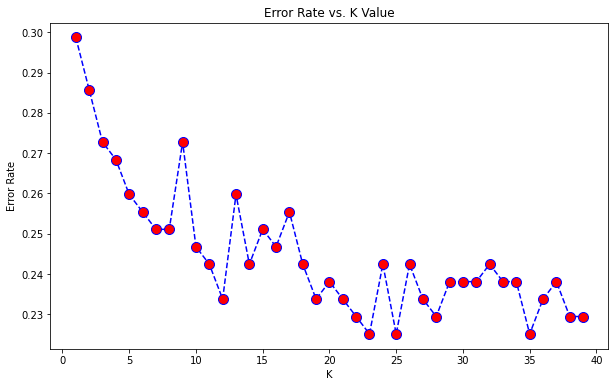

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [32]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITH K=1


[[125  37]
 [ 32  37]]


              precision    recall  f1-score   support

           0       0.80      0.77      0.78       162
           1       0.50      0.54      0.52        69

    accuracy                           0.70       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.71      0.70      0.70       231



In [33]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITH K=23


[[139  23]
 [ 29  40]]


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       162
           1       0.63      0.58      0.61        69

    accuracy                           0.77       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.77      0.77      0.77       231

